In [134]:
# Packages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [135]:
# Options
sns.set_style("whitegrid")
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', -1)

In [136]:
train_in = './data/transformed_data/model_train.csv'
test_in = './data/transformed_data/model_test.csv'

In [137]:
# Parameters
df_train = pd.read_csv(train_in)
df_train.head()

,Id,OverallQual,PropertyAge,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotalArea,FullBath,HalfBath,TotalBath,TotRmsAbvGrd,BedroomAbvGr,Neighborhood,MSZoning,BldgType,Remodelled,IsNew,IsPartial,LotArea,Functional,SalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,OverallQualLog,PropertyAgeLog,TotalBsmtSFLog,1stFlrSFLog,2ndFlrSFLog,GrLivAreaLog,TotalAreaLog,FullBathLog,HalfBathLog,TotalBathLog,TotRmsAbvGrdLog,BedroomAbvGrLog,SalePriceLog
0,1,0.666667,0.036765,0.266999,0.180373,0.469747,0.417856,0.401424,3,1,4,8,3,CollgCr,RL,1Fam,1,0,0,0.033420,Typ,208500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0.510826,0.036105,0.236651,0.165831,0.385090,0.349146,0.337489,1.386294,0.693147,1.609438,2.197225,1.386294,12.247699
1,2,0.555556,0.227941,0.393637,0.320663,0.000000,0.281810,0.346907,2,1,3,6,3,Veenker,RL,1Fam,1,0,0,0.038795,Typ,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0.441833,0.205339,0.331917,0.278134,0.000000,0.248273,0.297811,1.098612,0.693147,1.386294,1.945910,1.386294,12.109016
2,3,0.666667,0.051471,0.286962,0.202488,0.476348,0.440935,0.425456,3,1,4,6,3,CollgCr,RL,1Fam,0,0,0,0.046507,Typ,223500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0.510826,0.050190,0.252284,0.184393,0.389571,0.365292,0.354492,1.386294,0.693147,1.609438,1.945910,1.386294,12.317171
3,4,0.666667,0.669118,0.235808,0.216655,0.415842,0.419982,0.391856,2,0,2,7,3,Crawfor,RL,1Fam,0,0,0,0.038561,Typ,140000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0.510826,0.512295,0.211725,0.196105,0.347724,0.350644,0.330638,1.098612,0.000000,1.098612,2.079442,1.386294,11.849405
4,5,0.777778,0.058824,0.357143,0.280235,0.579208,0.566049,0.542167,3,1,4,9,4,NoRidge,RL,1Fam,1,0,0,0.060576,Typ,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0.575364,0.057158,0.305382,0.247044,0.456923,0.448556,0.433189,1.386294,0.693147,1.609438,2.302585,1.609438,12.429220


In [138]:
df_test_in = pd.read_csv(test_in)
df_test_in.head()


,Id,OverallQual,PropertyAge,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotalArea,LotArea,FullBath,HalfBath,TotalBath,TotRmsAbvGrd,BedroomAbvGr,Neighborhood,MSZoning,BldgType,Remodelled,IsNew,IsPartial,Functional,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,OverallQualLog,PropertyAgeLog,TotalBsmtSFLog,1stFlrSFLog,2ndFlrSFLog,GrLivAreaLog,TotalAreaLog,FullBathLog,HalfBathLog,TotalBathLog,TotRmsAbvGrdLog,BedroomAbvGrLog
0,1461,0.444444,0.384615,0.173111,0.104309,0.000000,0.104309,0.103313,0.184147,1.0,0.0,1.0,5,2,NAmes,RH,1Fam,1,0,0,Typ,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.367725,0.325422,0.159659,0.099220,0.000000,0.099220,0.098318,0.693147,0.000000,0.693147,1.791759,1.098612
1,1462,0.555556,0.407692,0.260844,0.196672,0.000000,0.196672,0.196672,0.232124,1.0,1.0,2.0,6,3,NAmes,RL,1Fam,1,0,0,Typ,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0.441833,0.341952,0.231781,0.179545,0.000000,0.179545,0.179545,0.693147,0.693147,1.098612,1.945910,1.386294
2,1463,0.444444,0.107692,0.182139,0.111135,0.376477,0.260666,0.210822,0.224197,2.0,1.0,3.0,6,3,Gilbert,RL,1Fam,0,0,0,Typ,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0.367725,0.102279,0.167326,0.105382,0.319527,0.231640,0.191299,1.098612,0.693147,1.386294,1.945910,1.386294
3,1464,0.555556,0.100000,0.181747,0.110708,0.364125,0.255333,0.207125,0.154326,2.0,1.0,3.0,7,3,Gilbert,RL,1Fam,1,0,0,Typ,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0.441833,0.095310,0.166994,0.104998,0.310513,0.227401,0.188241,1.098612,0.693147,1.386294,2.079442,1.386294
4,1465,0.777778,0.146154,0.251227,0.186220,0.000000,0.186220,0.186220,0.064121,2.0,0.0,2.0,5,2,StoneBr,RL,TwnhsE,1,0,0,Typ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0.575364,0.136412,0.224124,0.170772,0.000000,0.170772,0.170772,1.098612,0.000000,1.098612,1.791759,1.098612


In [139]:
df_test_in[(
    df_test_in['Id'] == 2121
)]

,Id,OverallQual,PropertyAge,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotalArea,LotArea,FullBath,HalfBath,TotalBath,TotRmsAbvGrd,BedroomAbvGr,Neighborhood,MSZoning,BldgType,Remodelled,IsNew,IsPartial,Functional,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,OverallQualLog,PropertyAgeLog,TotalBsmtSFLog,1stFlrSFLog,2ndFlrSFLog,GrLivAreaLog,TotalAreaLog,FullBathLog,HalfBathLog,TotalBathLog,TotRmsAbvGrdLog,BedroomAbvGrLog
660,2121,0.333333,0.484615,0.193916,0.104309,0.0,0.104309,0.11085,0.081081,1.0,0.0,1.0,4,2,BrkSide,RM,1Fam,0,0,0,Typ,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0.287682,0.395156,0.177238,0.09922,0.0,0.09922,0.105126,0.693147,0.0,0.693147,1.609438,1.098612


In [140]:
df_test = df_test_in.drop(['Id','OverallQual', 'Neighborhood', 'MSZoning', 'BldgType', 'PropertyAge', 'Functional', 'TotalBsmtSF'], axis=1)

In [141]:
# Import + preprocess

df.drop([
    'OverallQual', 'Neighborhood', 'MSZoning', 'BldgType', 'PropertyAge', 'Functional', 'TotalBsmtSF', 'SalePrice',
], axis=1, inplace=True)

ValueError: labels ['OverallQual' 'Neighborhood' 'MSZoning' 'BldgType' 'PropertyAge'
 'Functional' 'TotalBsmtSF' 'SalePrice'] not contained in axis

In [125]:
# Define Features & Target
features = df.drop(['Id', 'SalePriceLog'], axis=1)
target = df[['SalePriceLog']]

In [126]:
features.head()

,1stFlrSF,2ndFlrSF,GrLivArea,TotalArea,FullBath,HalfBath,TotalBath,TotRmsAbvGrd,BedroomAbvGr,Remodelled,IsNew,IsPartial,LotArea,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,OverallQualLog,PropertyAgeLog,TotalBsmtSFLog,1stFlrSFLog,2ndFlrSFLog,GrLivAreaLog,TotalAreaLog,FullBathLog,HalfBathLog,TotalBathLog,TotRmsAbvGrdLog,BedroomAbvGrLog
0,0.180373,0.469747,0.417856,0.401424,3,1,4,8,3,1,0,0,0.033420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0.510826,0.036105,0.236651,0.165831,0.385090,0.349146,0.337489,1.386294,0.693147,1.609438,2.197225,1.386294
1,0.320663,0.000000,0.281810,0.346907,2,1,3,6,3,1,0,0,0.038795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0.441833,0.205339,0.331917,0.278134,0.000000,0.248273,0.297811,1.098612,0.693147,1.386294,1.945910,1.386294
2,0.202488,0.476348,0.440935,0.425456,3,1,4,6,3,0,0,0,0.046507,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0.510826,0.050190,0.252284,0.184393,0.389571,0.365292,0.354492,1.386294,0.693147,1.609438,1.945910,1.386294
3,0.216655,0.415842,0.419982,0.391856,2,0,2,7,3,0,0,0,0.038561,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0.510826,0.512295,0.211725,0.196105,0.347724,0.350644,0.330638,1.098612,0.000000,1.098612,2.079442,1.386294
4,0.280235,0.579208,0.566049,0.542167,3,1,4,9,4,1,0,0,0.060576,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0.575364,0.057158,0.305382,0.247044,0.456923,0.448556,0.433189,1.386294,0.693147,1.609438,2.302585,1.609438


In [142]:
def rmse_cv(model):
    rmse= np.log1p(np.sqrt(
        -cross_val_score(model, features, target, scoring="neg_mean_squared_error", cv = 30)
    ))
    return(rmse)

Text(0,0.5,'rmse')

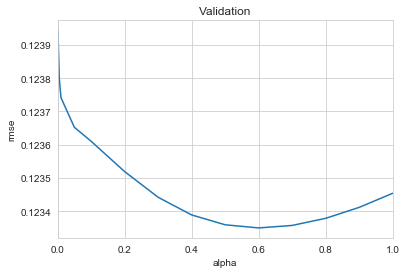

In [143]:
# Ridge Regression
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [147]:
model = Ridge(alpha=1).fit(features, target)

In [148]:
df_test[(
    df_test['Id'] == 2121
)]

KeyError: 'Id'

In [149]:
df_sub = pd.DataFrame()
df_sub['Id'] = df_test_in['Id']
df_sub['SalePrice'] = np.expm1(model.predict(df_test))

In [150]:
df_sub.to_csv('./data/output_data/my_submission.csv', index=False)

In [ ]:
model = RidgeCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]).fit(features, target)
rmse_cv(model).mean()

In [ ]:
coef = pd.Series(model.coef_, index = features.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

#### Sources & Reference

Tutorials & Papers:  
* [Cardinality Reduction](https://pkghosh.wordpress.com/2017/10/09/combating-high-cardinality-features-in-supervised-machine-learning/)  
* [FA & PCA](https://www.dummies.com/programming/big-data/data-science/data-science-using-python-to-perform-factor-and-principal-component-analysis/)  
* [Factor Analysis for Decomposition](https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781783989485/1/ch01lvl1sec19/using-factor-analysis-for-decomposition)  
* [SKL Decomposition](http://scikit-learn.org/stable/modules/decomposition.html)  
* [Clustering Mixed Data](https://datascience.stackexchange.com/questions/8681/clustering-for-mixed-numeric-and-nominal-discrete-data)  
* [Log Transforms](https://stats.stackexchange.com/questions/18844/when-and-why-should-you-take-the-log-of-a-distribution-of-numbers)
* [Box Cox Transformation](https://www.statisticshowto.datasciencecentral.com/box-cox-transformation/)  
* [Log Transforms](http://onlinestatbook.com/2/transformations/log.html)   
* [SKL ensembling](http://scikit-learn.org/stable/modules/ensemble.html)  


Kaggle Kernels & Notebooks: 
* [Data Exploration Kernel](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
* [Good Overall Kaggle Kernel](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)  
* [Applied Regression](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset)  
* [Regularized Linear Models](https://www.kaggle.com/apapiu/regularized-linear-models)  